In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as smp

from sympy import oo
from scipy import integrate
from scipy.optimize import linprog
from scipy import stats
from scipy.stats import shapiro

# 1.

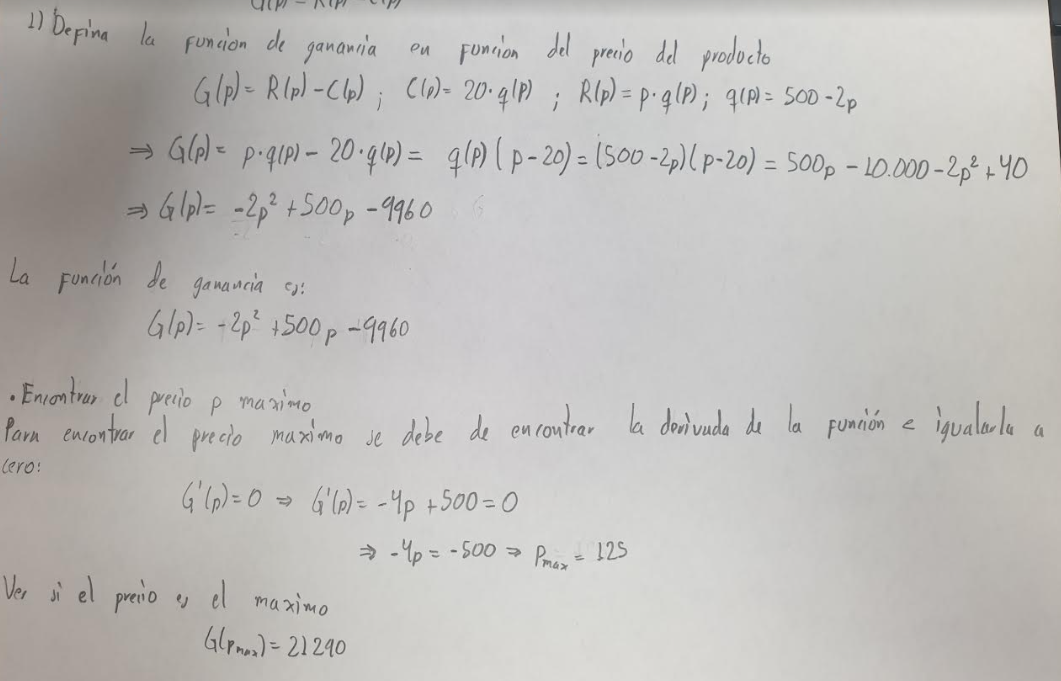

In [6]:
#Maximizar la funcion utilizando gradiente ascendente

#Definir la función
def f(x):
  return -2*x**2 + 500*x - 9960

#Definir el gradiente de la función
def grad_f(x):
  return -4*x + 500

In [7]:
# Parámetros del gradiente ascendente
eta = 0.1  # tasa de aprendizaje
max_iter = 100  # número máximo de iteraciones
tol = 1e-6  # tolerancia para la convergencia

#Inicialización
x = 0.0  # punto inicial
for i in range(max_iter):
  grad = grad_f(x)
  x_new = x + eta * grad

  #Verificar la convergencia
  if abs(x_new - x) < tol:
    break
  x = x_new

print(f"Punto máximo: x = {round(x,2)}")
print(f"Valor máximo: f(x) = {round(f(x),2)}")

Punto máximo: x = 125.0
Valor máximo: f(x) = 21290.0


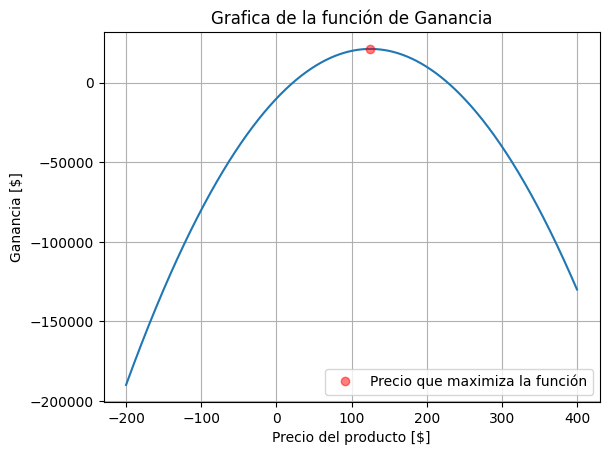

In [8]:
#Definicion de la variable independiente
p = np.linspace(-200, 400, 1000)

#Definicion de la variable dependiente
G = -2*p**2 + 500*p -9960

def ganancia(p):
  return -2*p**2 + 500*p -9960

#Graficar la función
plt.plot(p, G)
plt.plot(125, ganancia(125), 'o', color= 'r', alpha= 0.5, label= 'Precio que maximiza la función')
plt.title('Grafica de la función de Ganancia')
plt.xlabel('Precio del producto [$]')
plt.ylabel('Ganancia [$]')
plt.legend()
plt.grid()
plt.show()

# 2.

In [9]:
#Datos
datos = {
    'luz_solar': [2, 3, 5, 6, 8, 9],
    'altura_planta': [5, 7, 10, 13, 15, 18]
}

#Crear el data frame
df_planta = pd.DataFrame(datos)
df_planta

,luz_solar,altura_planta
0,2,5
1,3,7
2,5,10
3,6,13
4,8,15
5,9,18


Definición de la matrizes:

* $X = \begin{pmatrix}
1 & 2 \\
1 & 3 \\
1 & 5 \\
1 & 6 \\
1 & 8 \\
1 & 9 \\
\end{pmatrix}$

* $Y = \begin{pmatrix}
5 \\
7 \\
10 \\
13 \\
15 \\
18 \\
\end{pmatrix}$

* $β = \begin{pmatrix}
β_{0} \\
β_{1} \\
\end{pmatrix}$

Ecuación normal: $β = (X^{T} X)^{-1} X^{T} Y$


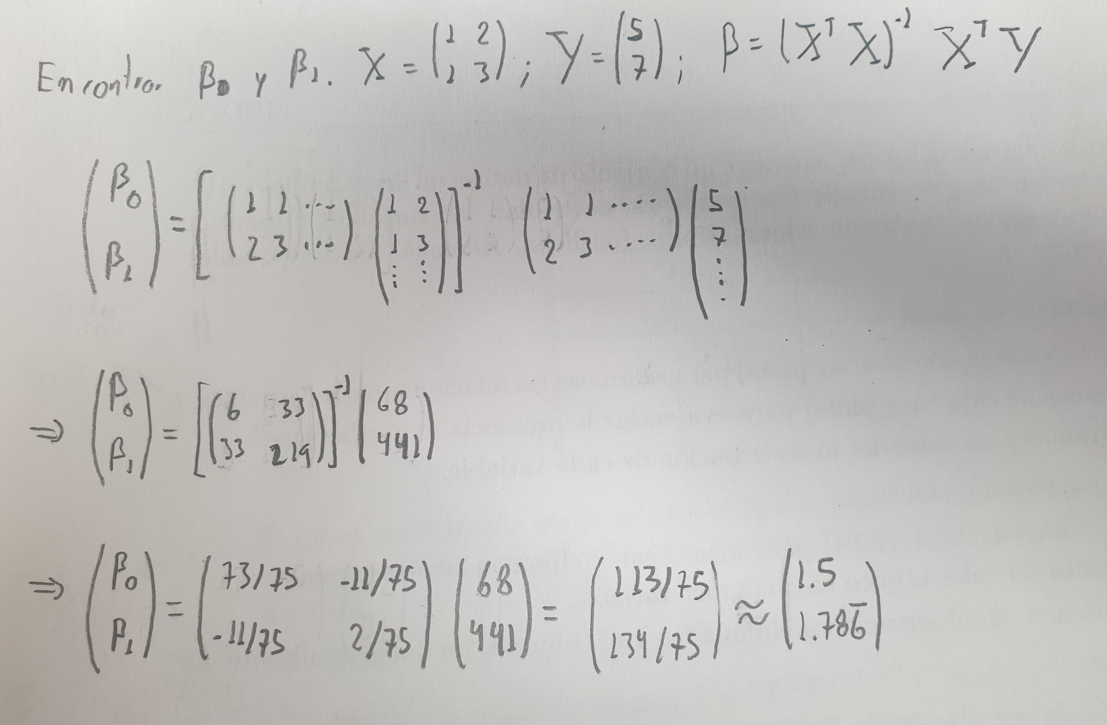

In [10]:
X = list(df_planta['luz_solar'])

#Definición de la matriz X para la ecuación normal
new_X = [[1,i] for i in X ]
new_X = np.array(new_X)

#Definición de la matriz Y para la ecuación normal
Y = list(df_planta['altura_planta'])

#Encontrar el coeficiente de la regresion utilizando la matriz inversa
beta = np.linalg.inv(new_X.T @ new_X) @ new_X.T @ Y

# Imprime los coeficientes
print("Coeficientes de regresión:", beta)

Coeficientes de regresión: [1.50666667 1.78666667]


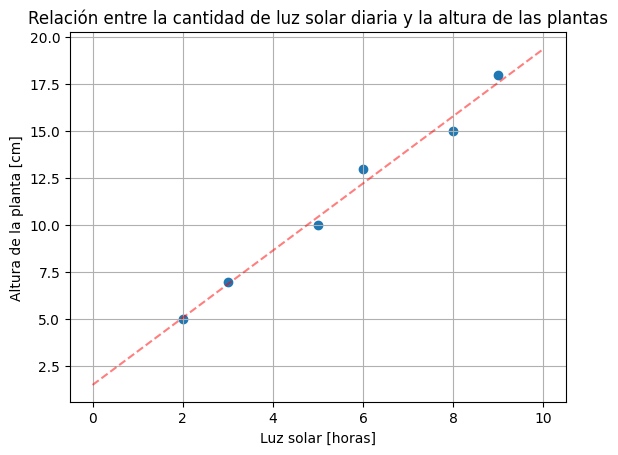

In [11]:
#La primera componente de beta es el intercepto (o término constante) y la segunda componente es la pendiente.
#Para describir la ecuación de la recata es
x = np.linspace(0,10)
y = beta[1] * x + beta[0]

#Graficar los resultados
plt.scatter(X,Y, marker= 'o')
plt.plot(x,y, linestyle='--', color= 'r', alpha= 0.5)
plt.title('Relación entre la cantidad de luz solar diaria y la altura de las plantas')
plt.xlabel('Luz solar [horas]')
plt.ylabel('Altura de la planta [cm]')
plt.grid()
plt.show()

In [12]:
#Valores verdaderos
y_true = Y

#Valores predichos
y_pred = beta[1] * np.array(X) + beta[0]

#Calcular el cuadrado de la diferencia
diferencias_cuadradas = (y_true - y_pred)**2

# Calcula el MSE tomando el promedio de los cuadrados de las diferencias
mse = np.mean(diferencias_cuadradas)

print("Error cuadrático medio (MSE):", mse)

#Calcular el error cuadratico medio (RMSE)
rmse = np.sqrt(mse)

print("Raíz cuadrada del error cuadrático medio (RMSE):", rmse)

Error cuadrático medio (MSE): 0.2711111111111116
Raíz cuadrada del error cuadrático medio (RMSE): 0.5206833117271108


Error cuadrático medio (MSE) en entrenamiento: 0.2857142857142859
Error cuadrático medio (MSE) en prueba: 0.3469387755102049
Coeficiente de determinación (R^2) en entrenamiento: 0.9831932773109243
Coeficiente de determinación (R^2) en prueba: 0.9783163265306122


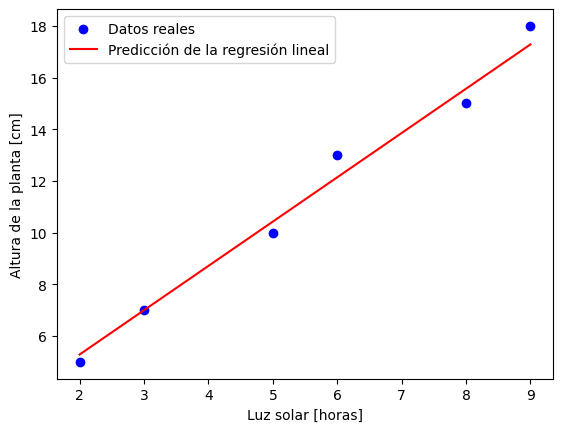

In [25]:
#Otra verificacion de los resultados obtenidos
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#Dar una nueva forma a los datos

X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

#Crear el modelo
model = LinearRegression()

#Entrenar el modelo
model.fit(X_train, y_train)

#Hacer predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Calcular el error cuadrático medio y el coeficiente de determinación R^2
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Error cuadrático medio (MSE) en entrenamiento: {mse_train}")
print(f"Error cuadrático medio (MSE) en prueba: {mse_test}")
print(f"Coeficiente de determinación (R^2) en entrenamiento: {r2_train}")
print(f"Coeficiente de determinación (R^2) en prueba: {r2_test}")


#Visualizar los resultados de la regresión lineal
plt.scatter(X, Y, color='blue', label='Datos reales')
plt.plot(X, model.predict(np.array(X).reshape(-1,1)), color='red', label='Predicción de la regresión lineal')
plt.xlabel('Luz solar [horas]')
plt.ylabel('Altura de la planta [cm]')
plt.legend()
plt.show()

In [34]:
intercepto = model.coef_[0][0]
print('Intercepto de la regresión lineal (b): ', intercepto)

pendiente = model.intercept_[0]
print('Pendiente de la regresión linela (m): ', pendiente)

Intercepto de la regresión lineal (b):  1.7142857142857142
Pendiente de la regresión linela (m):  1.8571428571428577


# 3.

In [1]:
# Vincular disco
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ruta = '/content/drive/MyDrive/Estudio/Maestría/Ciencia_de_Datos_y_Analitica/Examen_Admision/Datos/consumo_energia.csv'

#Crear dataframe
consumo_energia = pd.read_csv(ruta)
consumo_energia.head()

,Hora,Consumo_kWh
0,1,89.934283
1,2,77.234714
2,3,92.953771
3,4,110.460597
4,5,75.316933


In [5]:
#Verificar la base de datos
consumo_energia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hora         24 non-null     int64  
 1   Consumo_kWh  24 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 512.0 bytes


Como se puede ver la base de datos consumo_energia contiene dos columnas las cuales son las horas del dia y los kWh en esas horas

## Estadistica descriptiva

In [6]:
consumo_energia.describe()

,Hora,Consumo_kWh
count,24.000000,24.000000
mean,12.500000,77.047234
std,7.071068,19.475175
min,1.000000,41.734395
25%,6.750000,67.025567
50%,12.500000,75.400867
75%,18.250000,90.163513
max,24.000000,111.584256


## Formas de encontrar la moda de datos continuos

### Histograma

In [12]:
#Crear un histograma con 30 bins
counts, bin_edges = np.histogram(consumo_energia['Consumo_kWh'], bins=30)

#Encontrar el bin con la mayor frecuencia
max_bin_index = np.argmax(counts)
mode_bin_start = bin_edges[max_bin_index]
mode_bin_end = bin_edges[max_bin_index + 1]

print(f"El intervalo del bin con mayor frecuencia es: [{mode_bin_start}, {mode_bin_end})")

El intervalo del bin con mayor frecuencia es: [69.67433958816557, 72.00266829494235)


### KDE (Kernel Density Estimation)

La moda aproximada de los datos continuos es: 73.8735973925003


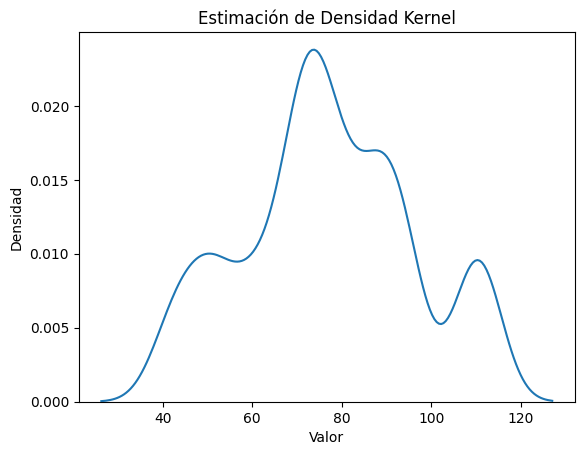

In [13]:
# Crear una estimación de densidad kernel
kde = sns.kdeplot(consumo_energia['Consumo_kWh'], bw_adjust=0.5)

# Encontrar el punto máximo de la estimación de densidad
kde_data = kde.get_lines()[0].get_data()
density = kde_data[1]
mode_index = np.argmax(density)
mode = kde_data[0][mode_index]

print(f"La moda aproximada de los datos continuos es: {mode}")

# Mostrar el gráfico
plt.title('Estimación de Densidad Kernel')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

### Scipy

La moda aproximada de los datos continuos es: 76.48452625603522


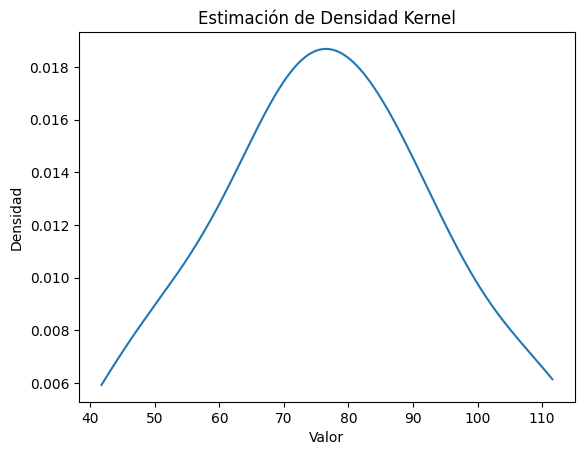

In [14]:
# Usar la estimación de densidad kernel de scipy
kde = stats.gaussian_kde(consumo_energia['Consumo_kWh'])

# Evaluar la densidad en un rango de valores
x_vals = np.linspace(min(consumo_energia['Consumo_kWh']), max(consumo_energia['Consumo_kWh']), 1000)
density = kde(x_vals)

# Encontrar el punto máximo de la densidad
mode = x_vals[np.argmax(density)]

print(f"La moda aproximada de los datos continuos es: {mode}")

# Mostrar el gráfico
plt.plot(x_vals, density)
plt.title('Estimación de Densidad Kernel')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

In [15]:
#Media de la base de datos
media = consumo_energia['Consumo_kWh'].mean()
print('La media del consumo de energía eléctrica por hora es: ', round(media, 2), 'kWh')

#Mediana de la base de datos
mediana = consumo_energia['Consumo_kWh'].median()
print('La mediana del consumo de energía eléctrica por hora es: ', round(mediana, 2), 'kWh')

#Moda de la base de datos
moda = consumo_energia['Consumo_kWh'].mode()
#print('La moda del consumo de energía eléctrica por hora es: ', round(moda, 2), 'kWh')
print(f"El intervalo del bin con mayor frecuencia es: [{mode_bin_start}, {mode_bin_end})")

#Desviación estandas de la base de datos
desviacion_estandar = consumo_energia['Consumo_kWh'].std()
print('La desviación estandas del consumo de energía eléctrica por hora es: ', round(desviacion_estandar, 2))

La media del consumo de energía eléctrica por hora es:  77.05 kWh
La mediana del consumo de energía eléctrica por hora es:  75.4 kWh
El intervalo del bin con mayor frecuencia es: [69.67433958816557, 72.00266829494235)
La desviación estandas del consumo de energía eléctrica por hora es:  19.48


## Calculo del primer y tercer cuartil


In [8]:
primer_cuartil = np.percentile(consumo_energia['Consumo_kWh'], 25)
print('El primer cuartil es: ', round(primer_cuartil, 2))

tercer_cuartil = np.percentile(consumo_energia['Consumo_kWh'], 75)
print('El tercer cuartil es: ', round(tercer_cuartil, 2))

El primer cuartil es:  67.03
El tercer cuartil es:  90.16


De los cuartiles obtenidos podemos ver que el 25% inferior de los datos no superan el valor de 67.03 kWh y que 25% superior de los datos superan el valor de 90.16 kWh.

También nos muestran que el 75% de los datos esta por debajo de los 90.16 kWh.

## Evaluación del consumo

In [9]:
consumo_alto = consumo_energia[consumo_energia['Consumo_kWh'] > 100]
consumo_alto

,Hora,Consumo_kWh
3,4,110.460597
6,7,111.584256
20,21,109.312975


Vemos que hay un consumo alto a las 4, 7 y 21 horas. Para ver la proporción de horas que tienen un consumo alto se debe de realizar la relación: <br>

* $C_{alto}$ = cantidad de horas con consumo alto
* $C_{T}$ = cantidad de horas totales

Proporción de horas = $\frac{C_{alto}}{C_{T}}$

In [10]:
proporcion_horas = len(consumo_alto.index)/len(consumo_energia.index) * 100
print('Proporcion de horas que tienen un consumo alto es del ', proporcion_horas, '%')

Proporcion de horas que tienen un consumo alto es del  12.5 %


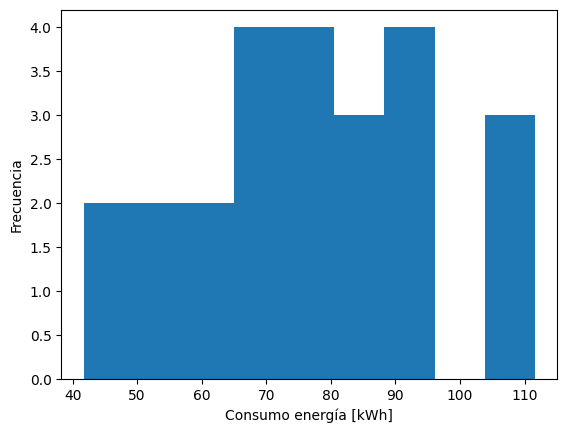

In [11]:
#Miremos la distribución de los datos
plt.hist(consumo_energia['Consumo_kWh'], 9)
plt.xlabel('Consumo energía [kWh]')
plt.ylabel('Frecuencia')
plt.show()

Al observar el valor de la media `77.05 kWh` y el valor de la mediana `75.4 kWh` se evidencia una diferencia entre estos dos valores, siendo la media mayor que la mediana.

<center>
$media > mediana$
</center>

Esto nos ofrece información sobre la asimetría de los datos, la cual nos dice que es una asimetría positiva, indicando que hay una cola pesada a la derecha de la distribución, causando que la media se vea afectada por estos valores.

## Planificación de recursos

In [ ]:
consumo_alto

,Hora,Consumo_kWh
3,4,110.460597
6,7,111.584256
20,21,109.312975


Como podemos evidenciar hay un consumo alto en tres horas al día (4, 7 y 21 horas), por lo que se deben de implementar estas medidas de ahorro solo en estas tres horas.

In [ ]:
#Costo de opereción adicional
costo_adicional = 50
print('El costo adicional para una día laboral teniendo en cuenta las medidas de ahorro es de: $', costo_adicional*len(consumo_alto.index), ' al día')

El costo adicional para una día laboral teniendo en cuenta las medidas de ahorro es de: $ 150  al día


## Visualización de datos

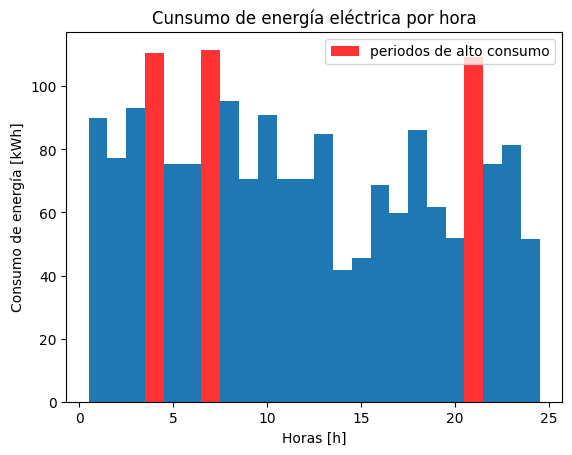

In [ ]:
#Histograma de consumo de energía eléctrica
plt.bar(x= consumo_energia[consumo_energia['Consumo_kWh'] < 100]['Hora'], height= consumo_energia[consumo_energia['Consumo_kWh'] < 100]['Consumo_kWh'], width= 1)
plt.bar(x= consumo_alto['Hora'], height= consumo_alto['Consumo_kWh'], width= 1, color= 'r', alpha= 0.8, label= 'periodos de alto consumo')
plt.title('Cunsumo de energía eléctrica por hora')
plt.xlabel('Horas [h]')
plt.ylabel('Consumo de energía [kWh]')
plt.legend()
plt.show()

# 4.

In [ ]:
ruta = '/content/drive/MyDrive/Estudio/Maestría/Ciencia_de_Datos_y_Analitica/Examen_Admision/Datos/datos_multivariados.csv'


df = pd.read_csv(ruta)
df.head()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10
0,67.450712,2,-29.934991,28.829296,24.383298,-48.555925,2.353574,6,13.348561,61.109444
1,57.926035,1,-64.802246,17.722053,40.557221,-78.541498,1.866080,3,5.683797,52.236995
2,69.715328,1,-31.323284,29.223811,47.868034,-89.712894,2.159612,3,7.613186,51.016134
3,82.845448,1,-16.399154,28.107013,43.789019,-83.321267,1.011936,1,2.767228,68.330652
4,56.487699,4,-26.871663,13.915823,40.434805,-83.971428,4.750303,4,3.260557,50.656943


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   variable_1   100 non-null    float64
 1   variable_2   100 non-null    int64  
 2   variable_3   100 non-null    float64
 3   variable_4   100 non-null    float64
 4   variable_5   100 non-null    float64
 5   variable_6   100 non-null    float64
 6   variable_7   100 non-null    float64
 7   variable_8   100 non-null    int64  
 8   variable_9   100 non-null    float64
 9   variable_10  100 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 7.9 KB


In [ ]:
df.describe()

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,33.442302,1.890000,-32.152788,22.827659,40.492676,-81.291451,2.508541,3.750000,7.287289,42.193758
std,26.921077,1.270449,12.060121,14.175685,8.281414,18.852398,1.301160,1.520068,3.731101,21.175232
min,-29.296177,0.000000,-93.339784,10.216753,20.381883,-121.732698,0.009552,1.000000,0.140631,4.647598
25%,10.998455,1.000000,-34.246923,13.376552,36.541046,-94.631543,1.565880,3.000000,4.872261,25.421261
50%,32.619480,2.000000,-29.853566,20.636566,40.508507,-83.461686,2.245815,4.000000,6.552963,37.597629
75%,56.487761,3.000000,-26.707786,26.264336,46.296849,-71.104983,3.391716,5.000000,10.148870,61.795889
max,87.784173,5.000000,-10.736343,84.746279,58.206090,-28.892119,5.622657,7.000000,16.619446,95.360645


## Visualización preliminar de datos

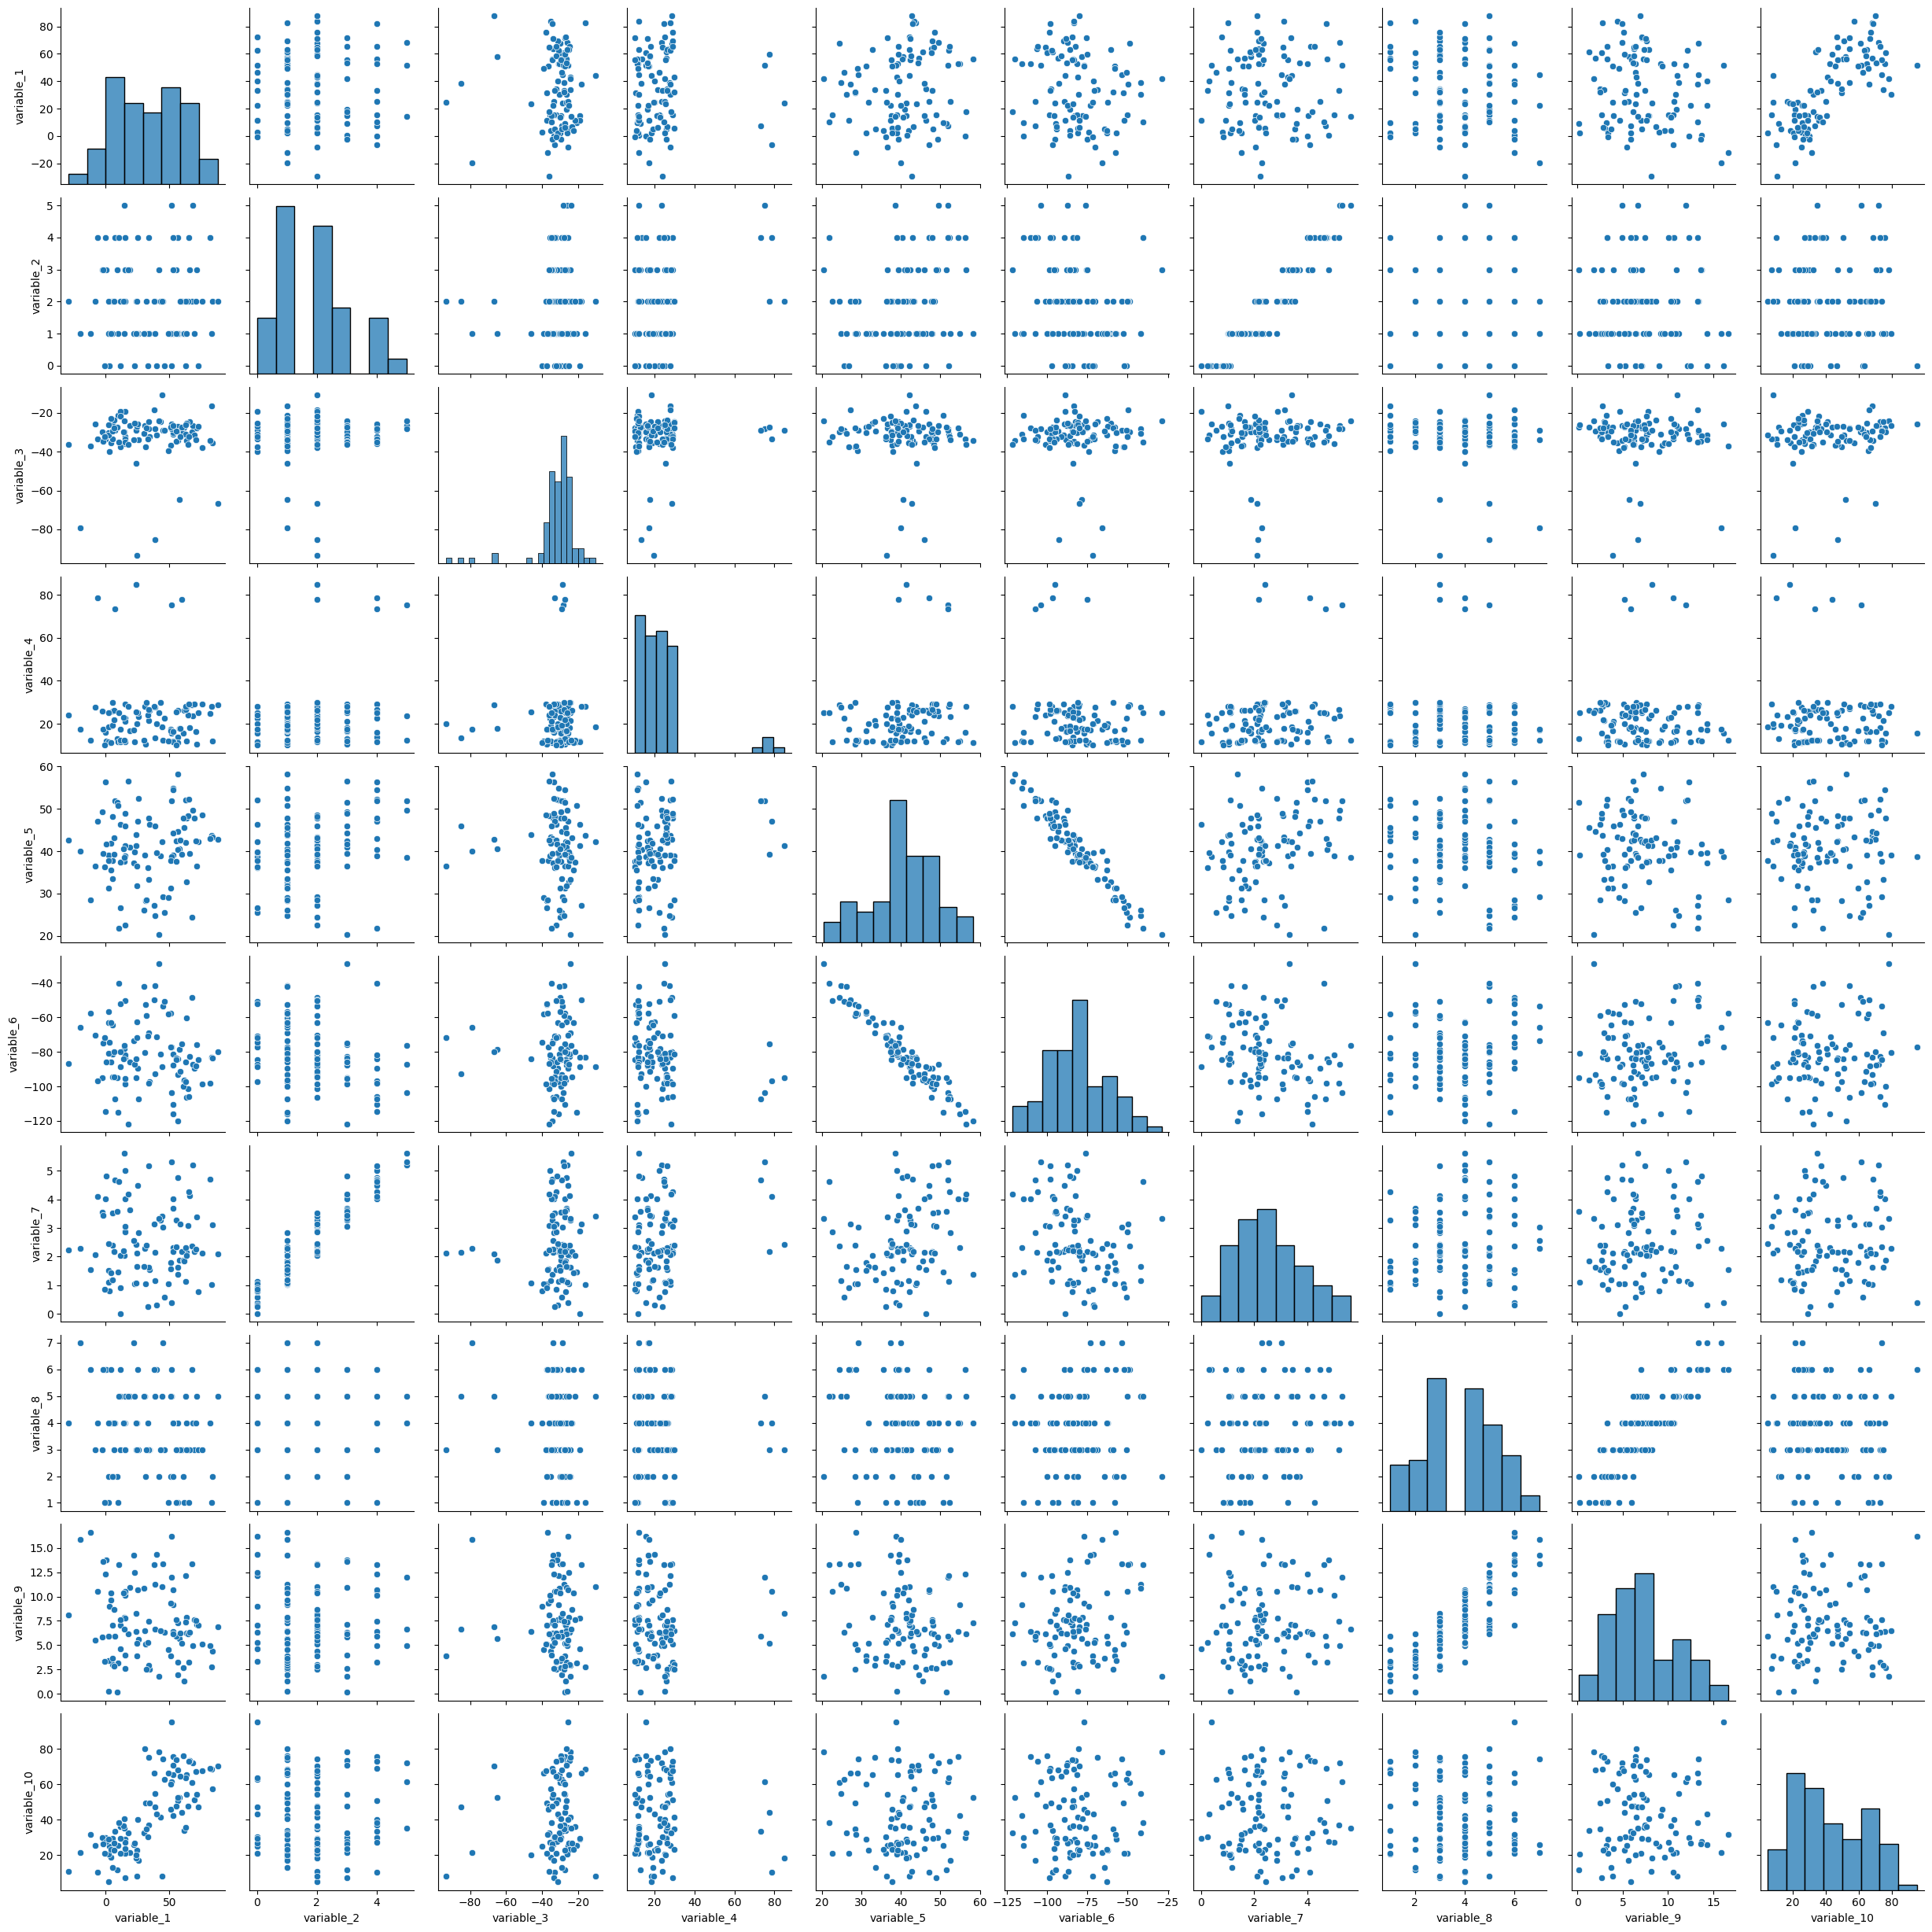

In [ ]:
#Scatter Plot
sns.pairplot(df, kind= 'scatter')
plt.show()

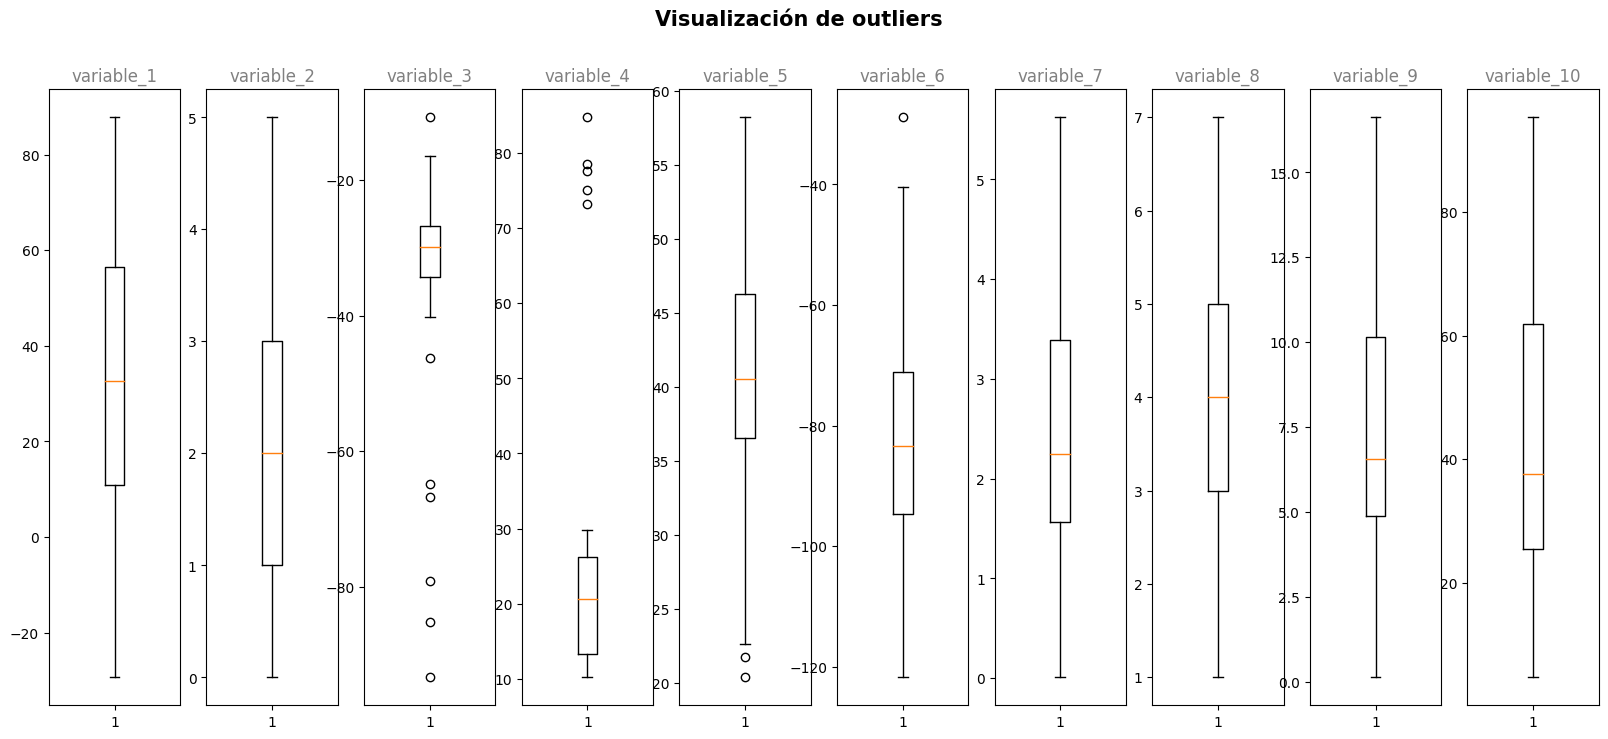

In [ ]:
#Visualize outliers
plt.figure(figsize= (20,8))
plt.suptitle('Visualización de outliers',
             color= 'black', weight= 'bold', fontsize= 15)

for i in range(len(list(df.columns))):
  plt.subplot(1, len(list(df.columns)), i+1)
  plt.boxplot(x= df.iloc[:, i])
  plt.title(df.columns[i], color = 'gray')
  plt.ylabel('')

plt.show()

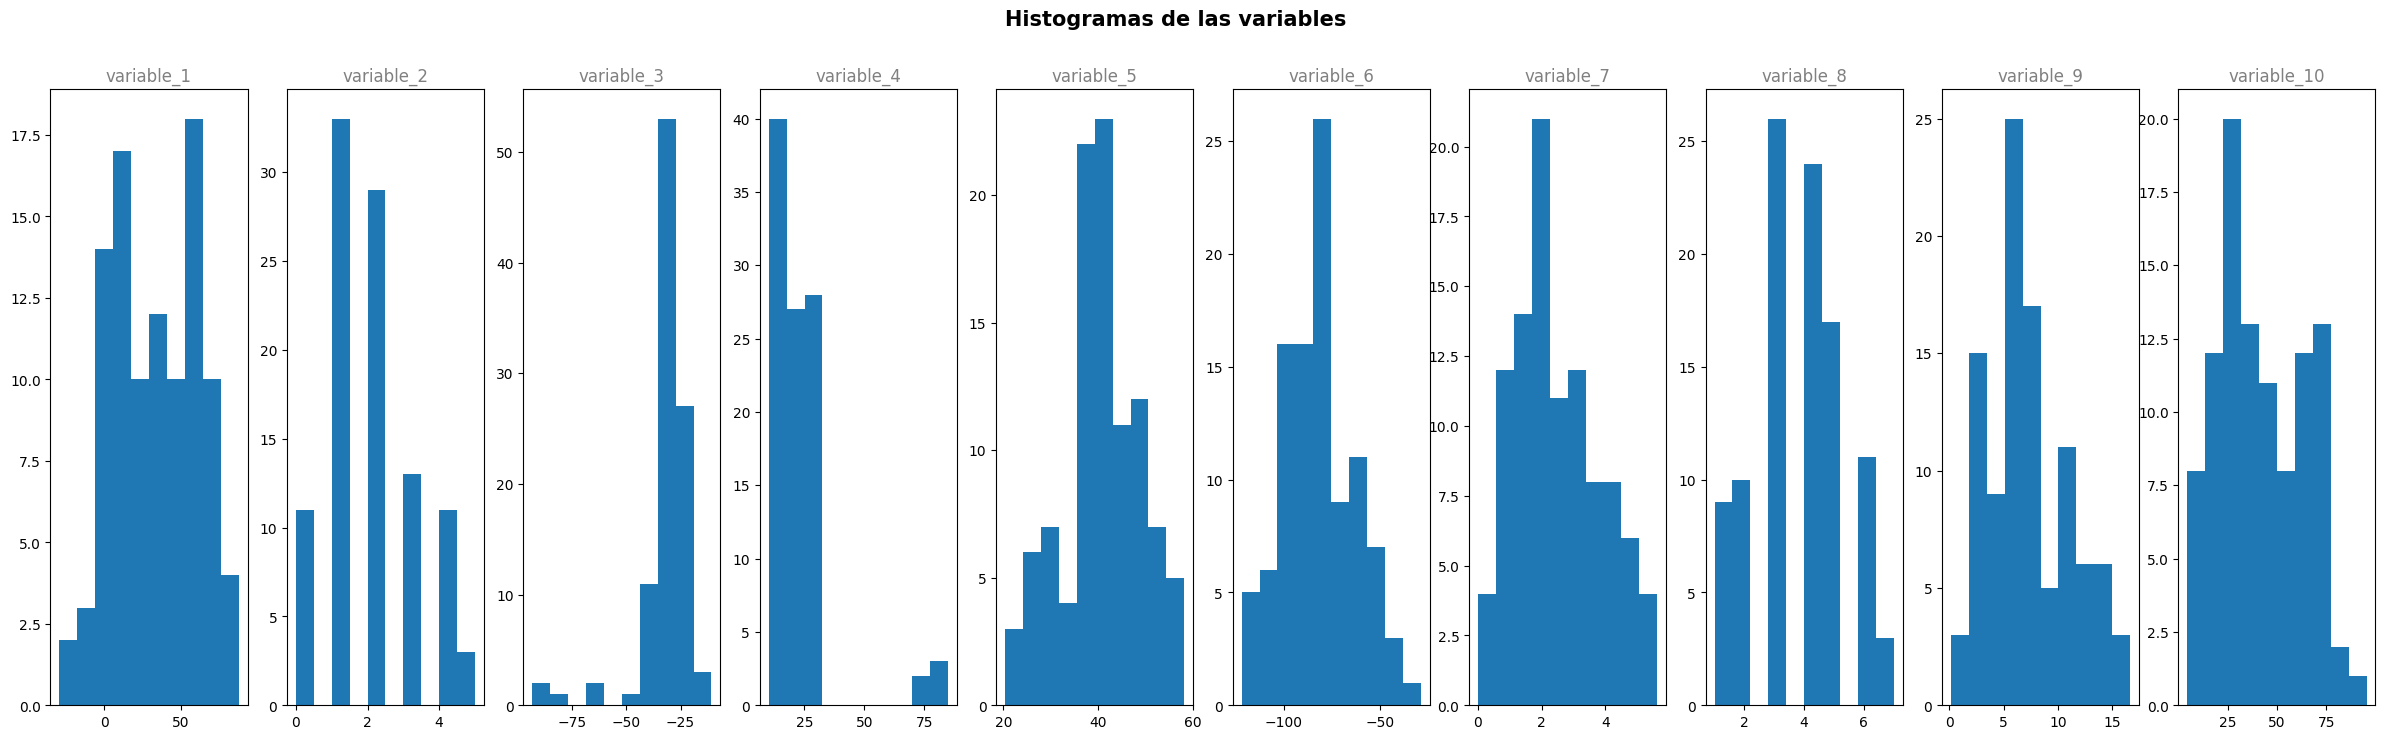

In [ ]:
plt.figure(figsize= (30,8))
plt.suptitle('Histogramas de las variables',
             color= 'black', weight= 'bold', fontsize= 15)

for i in range(len(list(df.columns))):
  plt.subplot(1, len(list(df.columns)), i+1)
  plt.hist(x= df.iloc[:, i])
  plt.title(df.columns[i], color = 'gray')
  plt.ylabel('')

plt.show()

## Identificación y eliminación de outliers

Al observar los diagramas de caja de cada una de las variables, se puede observar que las variables que contienen outliers son la 3, 4 y 6. Para utilizar el metodo IQR se debe de calcular el rango intercuartílico de cada una de las variables.

In [ ]:
#Variable 3
#Calculo de los percentiles
IQR_75 = df['variable_3'].quantile(0.75)
IQR_25 = df['variable_3'].quantile(0.25)

#Obtener el IQR
iqr = IQR_75 - IQR_25

#Calculo de los umbrales
upper = IQR_75 + (1.5 * iqr)
lower = IQR_25 - (1.5 * iqr)

#Crear el subset
outliers_v3 = df[(df['variable_3'] < lower) | (df['variable_3'] > upper)]
outliers_v3.head()
print('Cantidad de outliers: ', len(outliers_v3.index))

#Subset sin outliers
df_1 = df[(df['variable_3'] > lower)]
print(len(df_1.index))
df_1 = df_1[(df['variable_3'] < upper)]
print(len(df_1.index))

Cantidad de outliers:  7
94
93


<ipython-input-102-f9f801a02a77>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1 = df_1[(df['variable_3'] < upper)]


In [ ]:
#Ciclo para ver la cantidad de outliers en cada variable
df_limpio = df

for i in list(df.columns):
  #Calculo de los percentiles
  IQR_75 = df[i].quantile(0.75)
  IQR_25 = df[i].quantile(0.25)

  #Obtener el IQR
  iqr = IQR_75 - IQR_25

  #Calculo de los umbrales
  upper = IQR_75 + (1.5 * iqr)
  lower = IQR_25 - (1.5 * iqr)

  #Crear el subset
  outliers = df[(df[i] < lower) | (df[i] > upper)]
  outliers.head()
  print('Cantidad de outliers en ' ,i, ': ', len(outliers.index))

  df_limpio = df_limpio[(df_limpio[i] >= lower)]
  df_limpio = df_limpio[(df_limpio[i] <= upper)]


Cantidad de outliers en  variable_1 :  0
Cantidad de outliers en  variable_2 :  0
Cantidad de outliers en  variable_3 :  7
Cantidad de outliers en  variable_4 :  5
Cantidad de outliers en  variable_5 :  2
Cantidad de outliers en  variable_6 :  1
Cantidad de outliers en  variable_7 :  0
Cantidad de outliers en  variable_8 :  0
Cantidad de outliers en  variable_9 :  0
Cantidad de outliers en  variable_10 :  0


In [ ]:
#Dataframe sin outliers eliminados por el IQR
df_limpio.reset_index()
df_limpio = df_limpio.drop('index', axis= 1)

## Correlación de Datos

In [ ]:
#Calculo de la matriz de correlación de Pearson
correlacion_pearson = df_limpio.corr(method= 'pearson')
correlacion_pearson

,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10
variable_1,1.000000,0.021424,0.024391,0.147734,0.135299,-0.142365,0.050730,-0.165392,-0.113884,0.776359
variable_2,0.021424,1.000000,0.026141,0.126900,0.324604,-0.312933,0.937507,0.056848,-0.072551,0.009869
variable_3,0.024391,0.026141,1.000000,0.028930,-0.064061,0.079043,-0.004286,-0.079196,-0.108726,0.111983
variable_4,0.147734,0.126900,0.028930,1.000000,0.166002,-0.160692,0.097955,-0.118413,-0.192754,0.046463
variable_5,0.135299,0.324604,-0.064061,0.166002,1.000000,-0.963586,0.332476,-0.194129,-0.228644,0.003976
variable_6,-0.142365,-0.312933,0.079043,-0.160692,-0.963586,1.000000,-0.333262,0.211755,0.244407,-0.017906
variable_7,0.050730,0.937507,-0.004286,0.097955,0.332476,-0.333262,1.000000,0.108900,0.000387,0.029318
variable_8,-0.165392,0.056848,-0.079196,-0.118413,-0.194129,0.211755,0.108900,1.000000,0.828597,-0.045303
variable_9,-0.113884,-0.072551,-0.108726,-0.192754,-0.228644,0.244407,0.000387,0.828597,1.000000,0.051650
variable_10,0.776359,0.009869,0.111983,0.046463,0.003976,-0.017906,0.029318,-0.045303,0.051650,1.000000


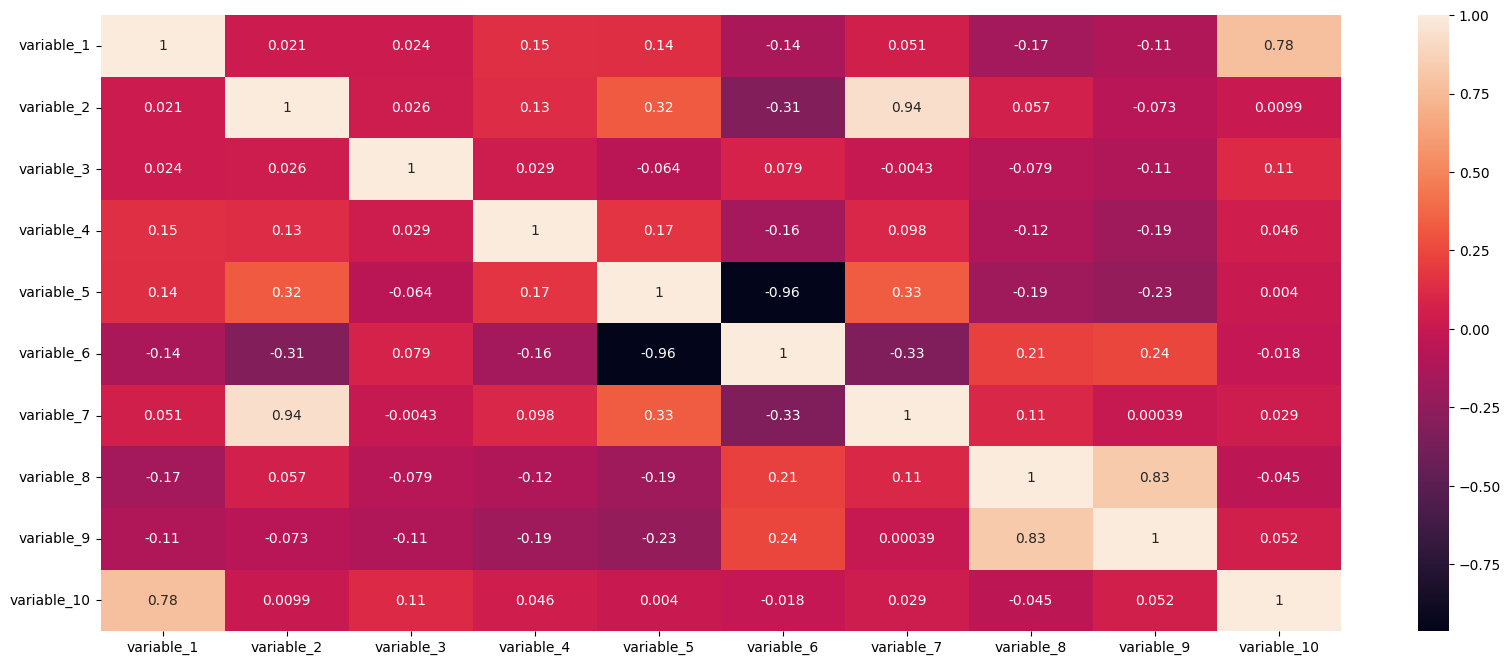

In [ ]:
#Visualizar la matriz de correlación
plt.figure(figsize=(20,8))
sns.heatmap(correlacion_pearson, annot= True)
plt.show()

## Selección de variables no correlacionadas

Estableciendo el umbral de correlacion en `0.7` vemos que los pares de variables que superan el umbral son:

* variable 1 y 10
* variable 2 y 7
* varaible 8 y 9
* Varaible 5 y 6

Seleccionar las variables que presenten una mayor dispersión de los datos

In [ ]:
variables_comparar = ['variable_1', 'variable_10', 'variable_2', 'variable_7', 'variable_8', 'variable_9', 'variable_5', 'variable_6']

for num, i in enumerate(variables_comparar):
  print(i, '\n')

  #Desviacion estandar y varianza
  desviacion_estandar = df_limpio[i].std(ddof= 0)
  varianza = df_limpio[i].var(ddof= 0)

  print('\t La desviacion estandar de ', i, ' es: ', round(desviacion_estandar,2))
  print('\t La varianza de ', i, ' es: ', round(varianza,2))

  #Coeficiente de variación
  cv = df_limpio[i].std(ddof=0) / df_limpio[i].mean()

  print('\t El coeficiente de variación de ', i, ' es: ', round(cv,2))

  if num % 2 != 0:

    print('-' * 70)

variable_1 

	 La desviacion estandar de  variable_1  es:  26.64
	 La varianza de  variable_1  es:  709.45
	 El coeficiente de variación de  variable_1  es:  0.79
variable_10 

	 La desviacion estandar de  variable_10  es:  20.66
	 La varianza de  variable_10  es:  427.04
	 El coeficiente de variación de  variable_10  es:  0.48
----------------------------------------------------------------------
variable_2 

	 La desviacion estandar de  variable_2  es:  1.24
	 La varianza de  variable_2  es:  1.54
	 El coeficiente de variación de  variable_2  es:  0.69
variable_7 

	 La desviacion estandar de  variable_7  es:  1.29
	 La varianza de  variable_7  es:  1.66
	 El coeficiente de variación de  variable_7  es:  0.53
----------------------------------------------------------------------
variable_8 

	 La desviacion estandar de  variable_8  es:  1.54
	 La varianza de  variable_8  es:  2.38
	 El coeficiente de variación de  variable_8  es:  0.42
variable_9 

	 La desviacion estandar de  variab

Al realizar la comparación entre la desviación estandar, la varianza y el coeficiente de variación podemos evidenciar que las variables con más disperción con respecto a su par son:

* De la variable 1 y 10 la que muestra una mayor dispersión es: 1
* De la variable 2 y 7 la que muestra una mayor dispersión es: 7
* De la variable 8 y 9 la que muestra una mayor dispersión es: 9
* De la variable 5 y 6 la que muestra una mayor dispersión es: 6

In [ ]:
df_final = df_limpio.drop(['variable_2', 'variable_5', 'variable_8', 'variable_10'], axis= 1)
df_final

,variable_1,variable_3,variable_4,variable_6,variable_7,variable_9
0,67.450712,-29.934991,28.829296,-48.555925,2.353574,13.348561
1,69.715328,-31.323284,29.223811,-89.712894,2.159612,7.613186
2,82.845448,-16.399154,28.107013,-83.321267,1.011936,2.767228
3,56.487699,-26.871663,13.915823,-83.971428,4.750303,3.260557
4,56.487946,-34.285788,11.387226,-120.094242,1.377760,7.303974
...,...,...,...,...,...,...
81,4.118378,-22.793634,11.126066,-63.154922,1.433137,10.348830
82,-11.952724,-37.179311,12.376358,-57.653833,1.527002,16.619446
83,14.441804,-24.184181,12.350525,-76.366828,5.622657,6.672206
84,13.915829,-29.948835,22.984206,-83.892164,2.206570,10.334206
